In [1]:
from qiskit import *

In [2]:
# API Token at https://quantum-computing.ibm.com/

IBMQ.save_account("2e24a159540abec4fb12ba0000114026c0bb1fd1406d001ee23e2b62811926403d8d9383c1b98b06713d0efd802492ffad613a90646ef43ae14ecd2e6801198e")

In [3]:
IBMQ.load_account()

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login with some authorized provider required., Error code: 3445.'

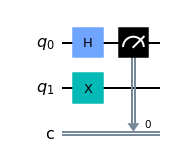

In [4]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.x(1)
qc.measure(0, 0)
qc.draw(output='mpl')


In [24]:
def get_backends():
    backends = []
    provider = IBMQ.get_provider()
    for backend in provider.backends():
        try:
            num_qubits = len(backend.properties().qubits)
        except:
            num_qubits = 0
        backend = (backend.name(), backend.status().pending_jobs, num_qubits)
        backends.append(backend)
    return backends
def get_best_backend(backends):
    max_qubit = max(backends, key=lambda item:item[2])[2]
    new_backends = []
    for backend in backends:
        if backend[2] == max_qubit:
            new_backends.append(backend)
    new_backends.sort(key = lambda x: x[1])
    return new_backends[0][0]


ibmq_quito


In [25]:
backend_name = get_best_backend(get_backends())
backend = provider.get_backend(backend_name)
jobs = execute(qc, backend=backend, shots = 1)
print(tools.job_monitor(jobs))

Job Status: job has successfully run
None


In [27]:
result = jobs.result()
print(result.get_counts(qc))

{'1': 1}
